In [ ]:
import pandas as pd
df=pd.read_csv('/content/Titanic-Dataset.csv')
print(df.head())
print(df.shape)
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [ ]:
# Generate Summary Statistics
print("Descriptive Statistics:")
print(df.describe())

# Median for all numeric columns
print("\nMedian Values:")
print(df.median(numeric_only=True))

# Standard deviation for numeric columns
print("\nStandard Deviation:")
print(df.std(numeric_only=True))

# Additional: Mode for each column
print("\nMode:")
print(df.mode().iloc[0])

Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Median Values:
PassengerId    446.0000
Survived         

In [ ]:
# Missing values
print("Missing values: \n")
print(df.isnull().sum())

Missing values: 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


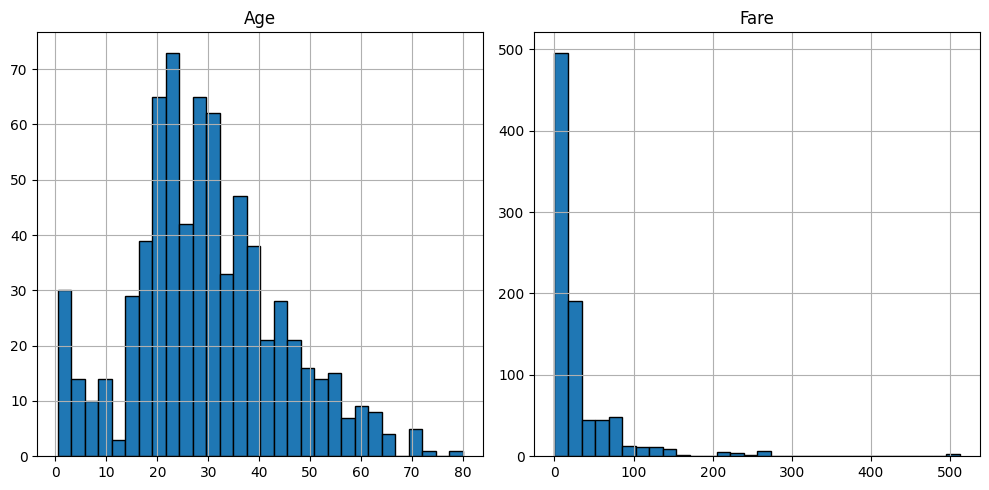

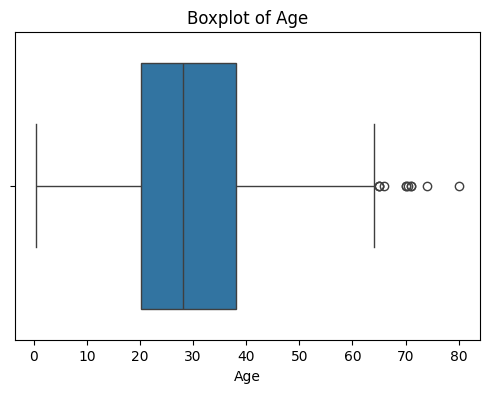

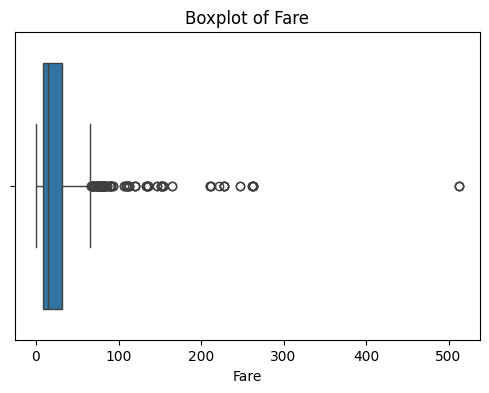

In [ ]:
#Histograms and Boxplots for Numeric Features
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram: Age, Fare
numeric_cols=['Age','Fare']
df[numeric_cols].hist(bins=30,figsize=(10,5),edgecolor='black')
plt.tight_layout()
plt.show()
# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


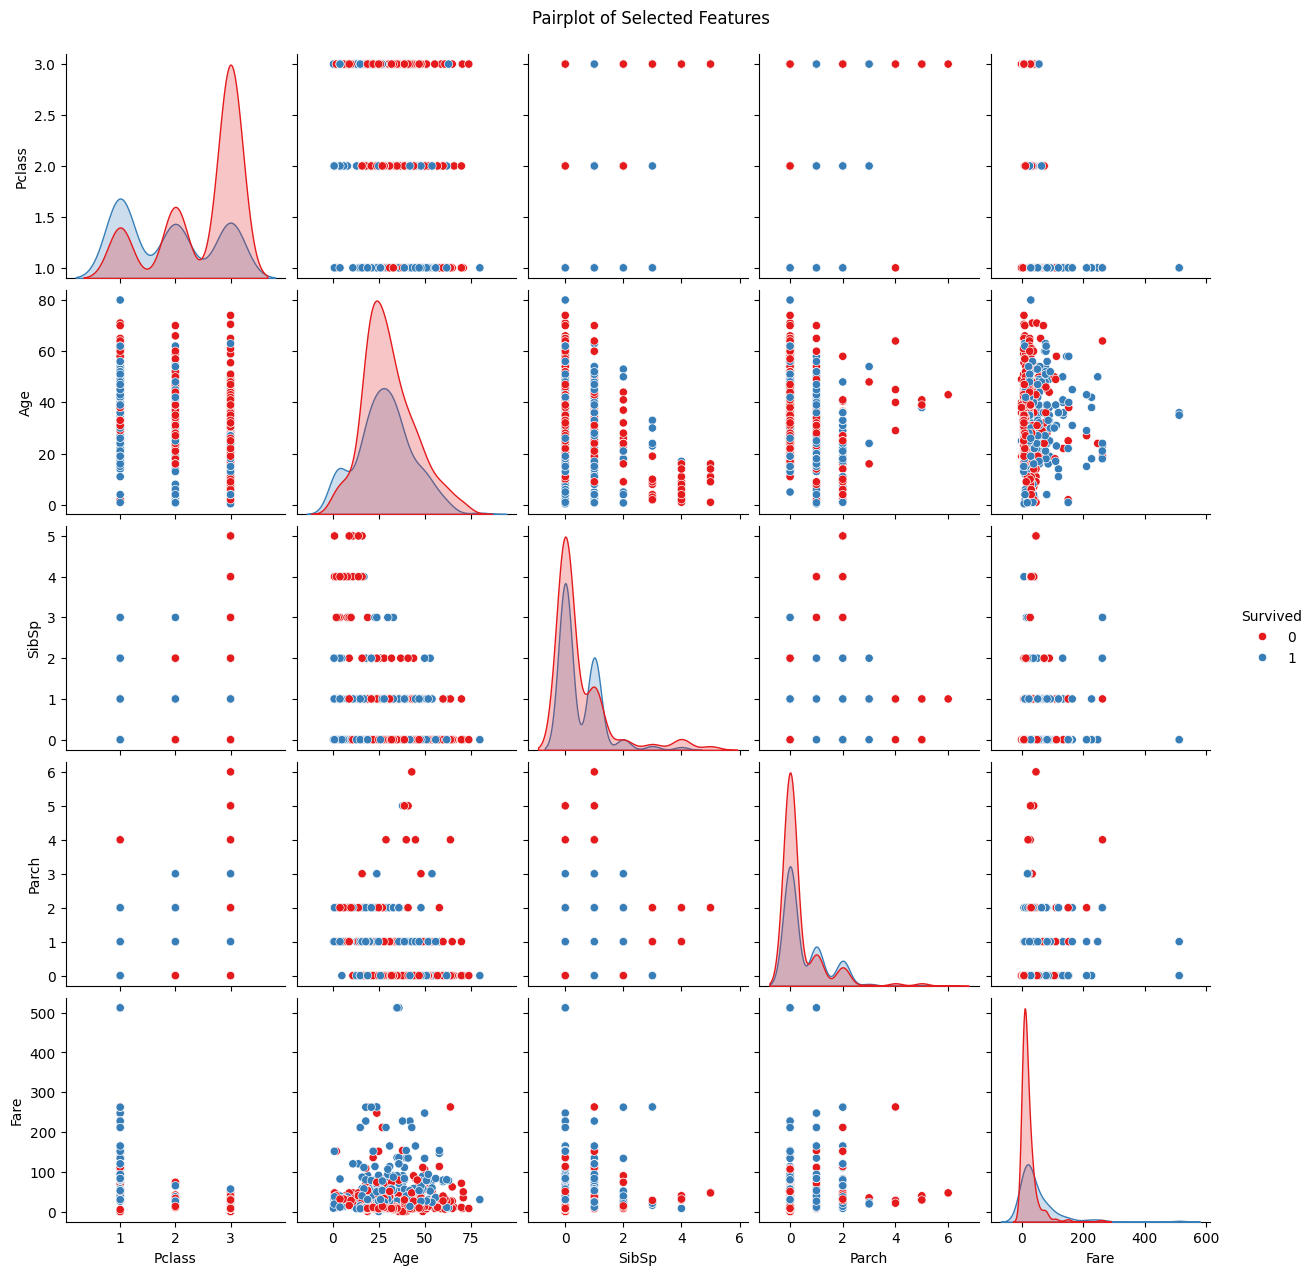

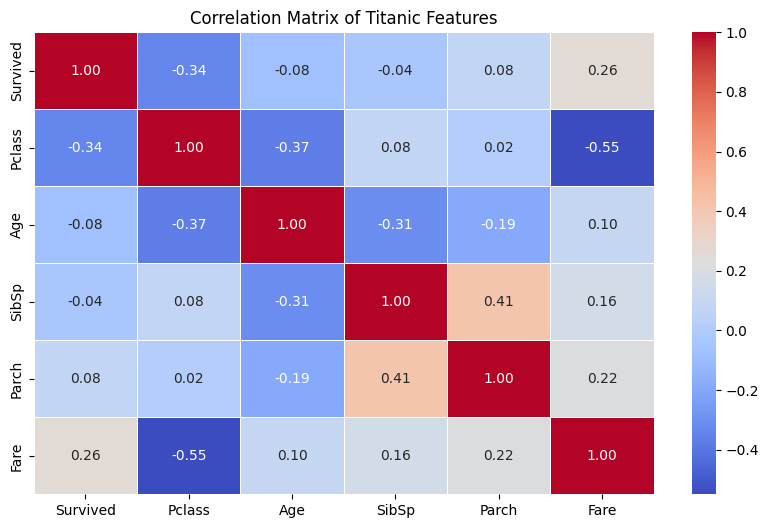

In [ ]:
# Pairplot and Correlation Matrix
# Pairplot
import seaborn as sns
import matplotlib.pyplot as plt
features=['Survived','Pclass','Age','SibSp','Parch','Fare']
df_clean=df[features].dropna()
sns.pairplot(df_clean,hue='Survived',palette='Set1',diag_kind='kde')
plt.suptitle("Pairplot of Selected Features",y=1.02)
plt.show()

# Correlation matrix
corr=df[features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix of Titanic Features")
plt.show()


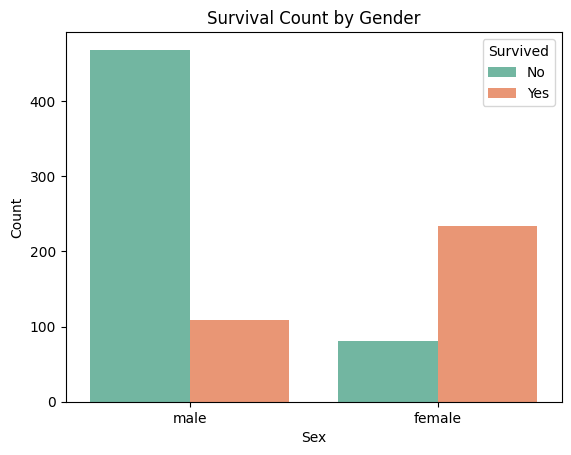

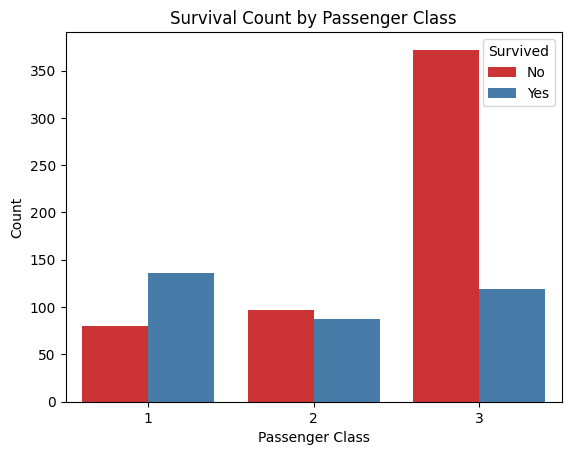

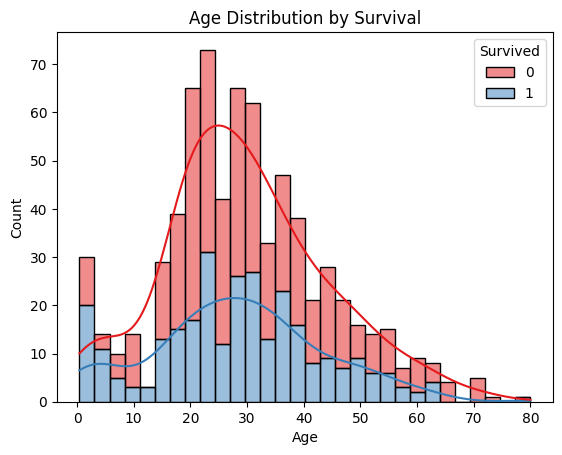

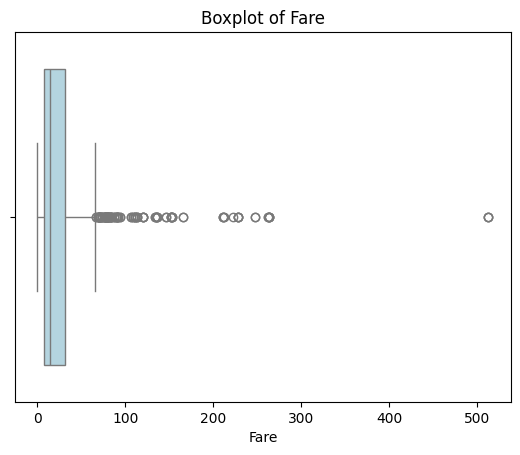

In [ ]:
#Identify Patterns, Trends, or Anomalies
# Survival rate by Gender
sns.countplot(data=df,x='Sex',hue='Survived',palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

# Survival by Passenger Class
sns.countplot(data=df,x='Pclass',hue='Survived',palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

# Age vs Survival
sns.histplot(data=df,x='Age',hue='Survived',multiple='stack',bins=30,palette='Set1',kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Fare Distribution – Check for Outliers
#Anomaly: There are extreme outliers in the Fare column
sns.boxplot(data=df,x='Fare',color='lightblue')
plt.title('Boxplot of Fare')
plt.show()



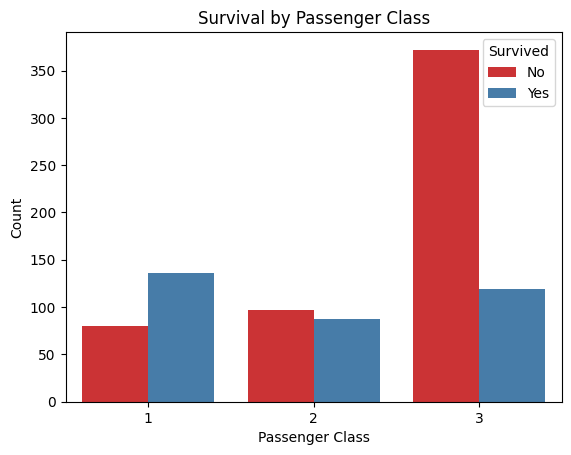

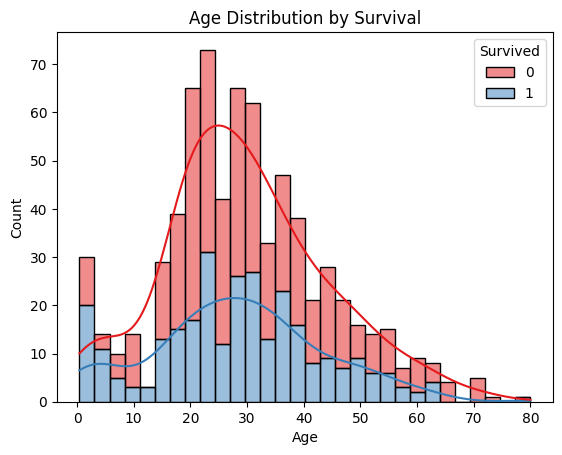

/tmp/ipython-input-22-2858207714.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Survived',y='Fare',palette='coolwarm')


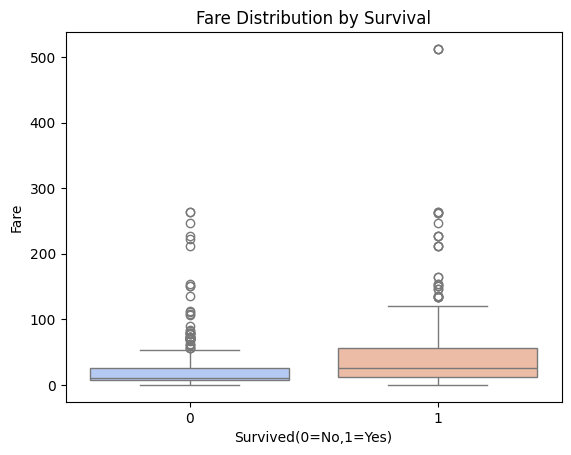

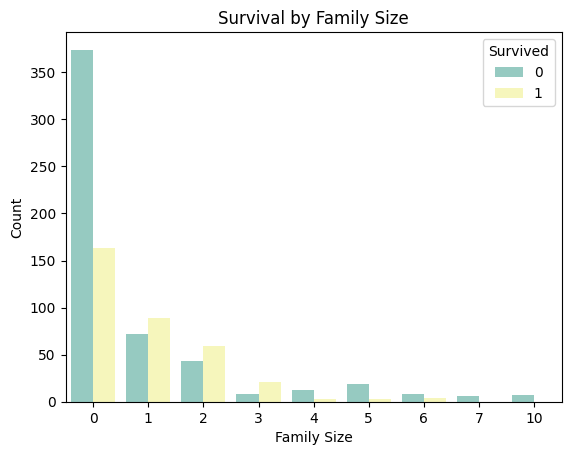

In [ ]:
#Basic feature-level inferences from visuals.
#Inference from Pclass
sns.countplot(data=df,x='Pclass',hue='Survived',palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

#Inference from Age
sns.histplot(data=df,x='Age',hue='Survived',multiple='stack',bins=30,palette='Set1',kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Inference from Fare
sns.boxplot(data=df,x='Survived',y='Fare',palette='coolwarm')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived(0=No,1=Yes)')
plt.ylabel('Fare')
plt.show()

#Inference from Family Size(SibSp+Parch)
df['FamilySize']=df['SibSp']+df['Parch']
sns.countplot(data=df,x='FamilySize',hue='Survived',palette='Set3')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()
